# **Linear Regression Model**

In this Jupyter Notebook, we will practice the Python implementation of two methods for training Linear Regression models: Normal Equation and Gradient Descent. The goal is to build a Linear Regression model that predicts the GPAs of university students from two features:
- Math SAT
- Verb SAT.

The file *sat_gpa.csv* contains all training and testing data.
- The file has 105 rows and 3 columns.
- Each row represents the record of a student.
- The 3 columns are:
    - Math SAT score
    - Verb SAT score
    - University GPA
- The first two columns are the features, and the third is the output.
- All data points are used as the training set.

In [1]:
# Import packages
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

***

## **1. Load Data and Preprocess**

In [3]:
# Load data 
data = np.loadtxt(open('../data/sat_gpa.csv'), delimiter=',')
print('shape of original data:', data.shape) # Check if data is 105 by 3

# Normalize data
data_norm = data / data.max(axis=0)

shape of original data: (105, 3)


***

## **2. Implement Normal Equation Method**

The Normal Equation for linear regression is: $\theta = (X^T X)^{-1}X^T y$

We use the learned $\theta$ to make predictions: $\hat{y} = X\theta$

Then compute the residual sum of squares of the model: $RSS = \sum_i (\hat{y}^{(i)} - y^{(i)})^2$

In [4]:
# Create matrix X and y
X = np.ones_like(data_norm)

# X has three columns: 
#   - The first column contain all 1s, which is for the intercept
#   - The second and third columns contain features (i.e., the 1st and 2nd columns of data_norm)
X[:, 1:3] = data_norm[:, 0:2]

# y has one column (i.e., the 3rd column of data_norm)
y = data_norm[:, 2]

# Compute theta using normal equation method
theta_method1 = np.dot(inv(np.dot(X.T, X)), np.dot(X.T, y))

# Use the theta obtained to make predictions and compute the residuals
y_hat = np.dot(X, theta_method1)
RSS1 = np.sum((y_hat - y)**2)

# Print results
print('Theta obtained from normal equation:', theta_method1)
print('Residual sum of squares (RSS): ', RSS1)

Theta obtained from normal equation: [-0.06234478  0.62017319  0.43647674]
Residual sum of squares (RSS):  0.7590471383029536


***

## **3. Implement Gradient Descent Method**

The cost function: $J(\theta_0, \theta_1, \theta_2) = \frac{1}{2m}\sum_i (\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2m}\sum_i (\theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} - y^{(i)})^2$

Gradients w.r.t. parameters: $\frac{\partial J}{\partial \theta} = \begin{cases}\frac{\partial J}{\partial \theta_0}\\ \frac{\partial J}{\partial \theta_1}\\ \frac{\partial J}{\partial \theta_2}\\ \end{cases} = \begin{cases}\frac{1}{m}\sum_i (\hat{y}^{(i)} - y^{(i)})\\ \frac{1}{m}\sum_i (\hat{y}^{(i)} - y^{(i)})x_1^{(i)}\\ \frac{1}{m}\sum_i (\hat{y}^{(i)} - y^{(i)})x_2^{(i)}\\\end{cases}$

The formula to update parameters at each iteration: $\theta := \theta - \alpha * \frac{\partial J}{\partial \theta}$

Note that $X$, $y$, and $\theta$ are all vectors (numpy arrays), and thus the operations above should be implemented in a vectorized fashion.

Therefore, we use `numpy.sum()`, `numpy.dot()` and other vectorized functions, and avoid writing `for` loops.

In [5]:
# Define the gradientDescent function
def gradientDescent(X, y, theta, alpha, num_iters):
    '''
    Params
        X - Shape: (m,3); m is the number of data examples
        y - Shape: (m,)
        theta - Shape: (3,)
        num_iters - Maximum number of iterations
    Return
        A tuple: (theta, RSS, cost_array)
        theta - the learned model parameters
        RSS - residual sum of squares
        cost_array - stores the cost value of each iteration. Its shape is (num_iters,)
    '''
    m = len(y)
    cost_array =[]

    for i in range(0, num_iters):
        # Make predictions
        # Shape of y_hat: m by 1
        y_hat = np.dot(X, theta)
        
        # Compute the difference between prediction (y_hat) and ground truth label (y)
        diff = y_hat - y

        # Compute the cost
        cost = (1/(2*m)) * np.sum((diff)**2)
        cost_array.append(cost)

        # Compute gradients
        # Shape of gradients is the same as theta
        gradients = np.zeros(theta.shape)
        gradients[0] = (1/m) * np.sum(diff)
        gradients[1] = (1/m) * np.sum(diff * X[:, 1])
        gradients[2] = (1/m) * np.sum(diff * X[:, 2])

        # Update theta
        theta = theta - alpha * gradients
    
    # Compute residuals
    y_hat = np.dot(X, theta)
    RSS = np.sum((y_hat - y)**2)
    return theta, RSS, cost_array

In [6]:
# Define learning rate and maximum iteration number
ALPHA = 0.05
MAX_ITER = 500

# Initialize theta to [0,0,0]
theta = np.zeros(3)
theta_method2, RSS2, cost_array = gradientDescent(X, y, theta, ALPHA, MAX_ITER)

print('Theta obtained from gradient descent:', theta_method2)
print('Residual sum of squares (RSS): ', RSS2)

Theta obtained from gradient descent: [0.29911574 0.32224209 0.31267172]
Residual sum of squares (RSS):  0.86416005843706


**NOTE**: It seems that the model trained with gradient descent has larger RSS than the one obtained with normal equation method.

***

## **3. Train with Different Learning Rate `alpha`s.**

Now, we plot the cost against the iteration number.

This is a common method of examining the performance of gradient descent.

We can try different values of learning rate, for example, $\alpha=\{0.01, 0.005, 0.001\}$, and see how the cost curves change. 

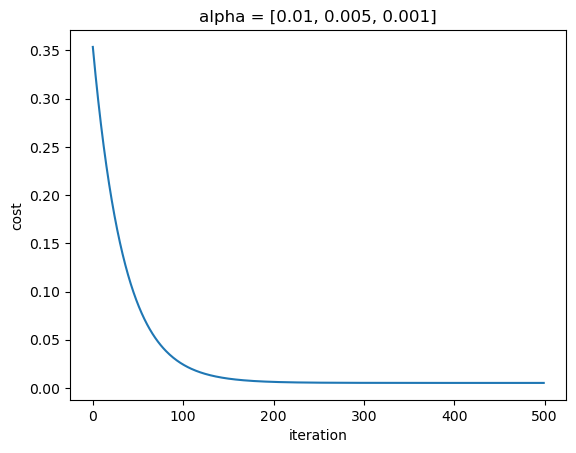

In [7]:
alpha = [0.01, 0.005, 0.001]
theta = np.zeros(3)
_, _, cost_array = gradientDescent(X, y, theta, alpha, MAX_ITER)

plt.plot(range(0,len(cost_array)), cost_array);
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('alpha = {}'.format(alpha))
plt.show()

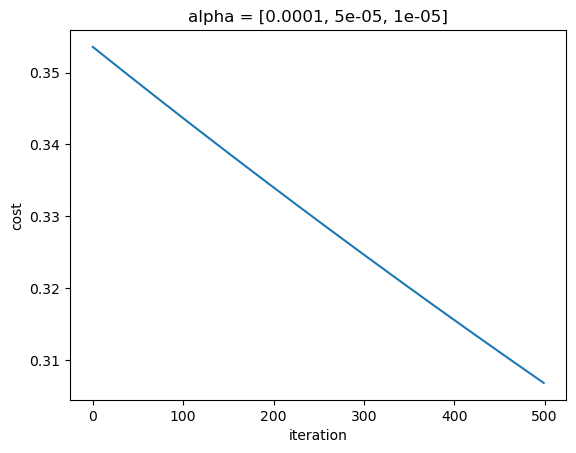

In [8]:
alpha = [0.0001, 0.00005, 0.00001]
theta = np.zeros(3)
_, _, cost_array = gradientDescent(X, y, theta, alpha, MAX_ITER)

plt.plot(range(0,len(cost_array)), cost_array);
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('alpha = {}'.format(alpha))
plt.show()

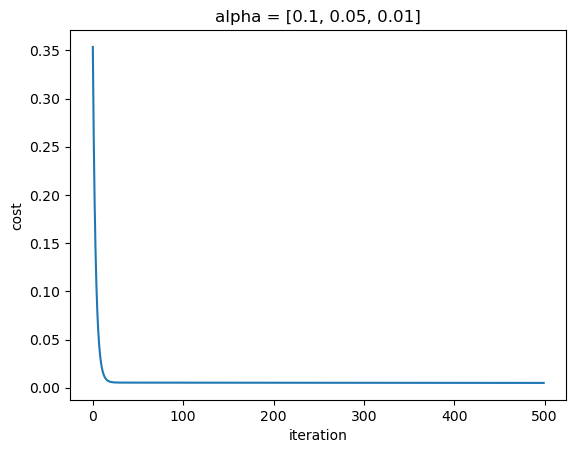

In [9]:
alpha = [0.1, 0.05, 0.01]
theta = np.zeros(3)
_, _, cost_array = gradientDescent(X, y, theta, alpha, MAX_ITER)

plt.plot(range(0,len(cost_array)), cost_array);
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('alpha = {}'.format(alpha))
plt.show()